## PAN CARD TAMPRING DETECTION

#### PAN Cards are equivalent to Tax Identification Number in INDIA
#### PAN Card tampering detection using Structural Similarity from OpenCV

In [1]:
# import the necessary packages
import requests
from PIL import Image
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity
from skimage.filters import threshold_otsu


In [2]:
!mkdir images


A subdirectory or file images already exists.


#### Get Images

In [3]:
# Request from URL
original = Image.open(requests.get(
    'https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get(
    'https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

# Image Formats
print(f"Original image format: {original.format}")
print(f"Tampered image format: {tampered.format}")

# Image sizes
print(f"Original image size: {original.size}")
print(f"Tampered image size: {tampered.size}")


Original image format: JPEG
Tampered image format: PNG
Original image size: (1200, 800)
Tampered image size: (282, 179)


In [4]:
# Resize Images
img_size = (250, 160)
original = original.resize(img_size)
tampered = tampered.resize(img_size)


In [5]:
# Save Images in jpg format
original.save('images/original.jpg')
tampered.convert('RGB').save('images/tampered.jpg')

# Load Images
original = Image.open('images/original.jpg')
tampered = Image.open('images/tampered.jpg')


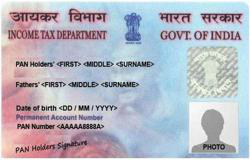

In [6]:
# Display Images
original


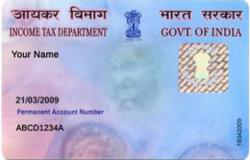

In [7]:
tampered


#### Open images in SKImage

In [8]:
original = imread('images/original.jpg')
tampered = imread('images/tampered.jpg')


In [9]:
# Convert to grayscale
original = (rgb2gray(original) * 255).astype('uint8')
tampered = (rgb2gray(tampered) * 255).astype('uint8')


#### Structural Similarity Index

In [10]:
score, diff_img = structural_similarity(original, tampered, full=True)
diff_img = (diff_img * 255).astype("uint8")
print(f"SSIM: {score}")


SSIM: 0.3196717201341849


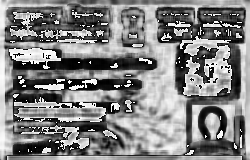

In [11]:
# Display difference image
Image.fromarray(diff_img)


#### Binary Image using OTSU's method

In [12]:
binary_img = diff_img <= threshold_otsu(diff_img)


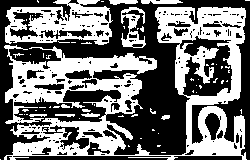

In [13]:
Image.fromarray(binary_img)
